C:\Users\mjlav\AppData\Local\Temp\ipykernel_25264\1809936585.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quarterly_stats = df_inter.groupby('quarter').agg(


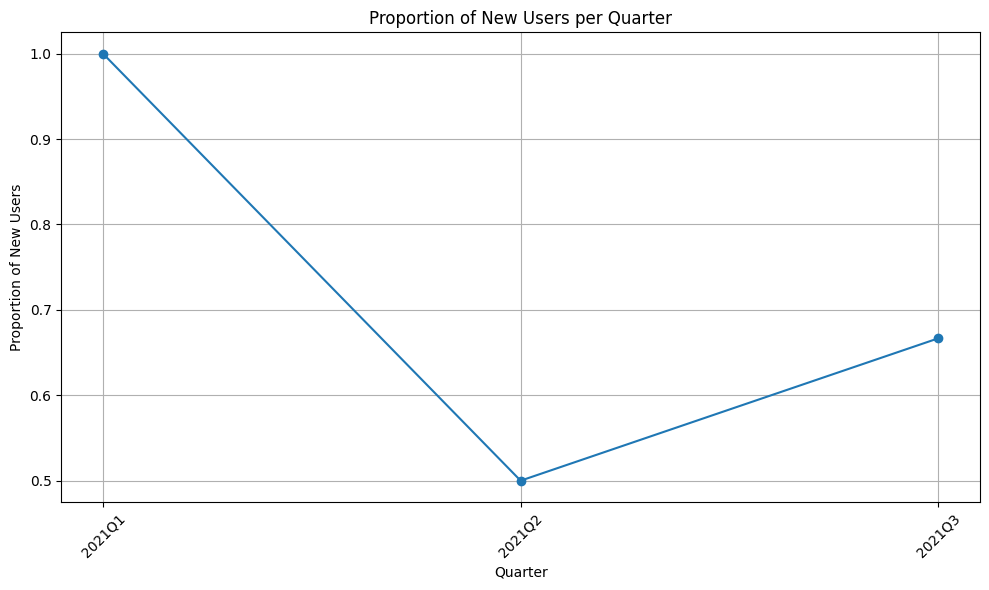

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame
# df_inter should have columns 'user_id' and 'quarter'
# Example:
df_inter = pd.DataFrame({
    'user_id': [1, 2, 1, 3, 4, 2, 5],
    'quarter': ['2021Q1', '2021Q1', '2021Q2', '2021Q2', '2021Q3', '2021Q3', '2021Q3']
})

# Ensure 'quarter' is a categorical type with a proper order
df_inter['quarter'] = pd.Categorical(df_inter['quarter'], ordered=True)

# Sort DataFrame by 'quarter' and 'user_id'
df_inter = df_inter.sort_values(by=['quarter', 'user_id']).drop_duplicates()

# Identify the first quarter each user appears in
first_appearance = df_inter.groupby('user_id')['quarter'].min().reset_index()
first_appearance.columns = ['user_id', 'first_quarter']

# Merge this information back to the original DataFrame
df_inter = pd.merge(df_inter, first_appearance, on='user_id')

# Determine if the user is new in the current quarter
df_inter['is_new_user'] = df_inter['quarter'] == df_inter['first_quarter']

# Group by quarter to get the count of new users and total users
quarterly_stats = df_inter.groupby('quarter').agg(
    total_users=('user_id', 'nunique'),
    new_users=('is_new_user', 'sum')
).reset_index()

# Calculate the proportion of new users
quarterly_stats['new_user_proportion'] = quarterly_stats['new_users'] / quarterly_stats['total_users']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(quarterly_stats['quarter'], quarterly_stats['new_user_proportion'], marker='o', linestyle='-')
plt.xlabel('Quarter')
plt.ylabel('Proportion of New Users')
plt.title('Proportion of New Users per Quarter')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


original
    item_id time_period
0        1      2021Q1
1        2      2021Q1
2        1      2021Q2
3        3      2021Q2
4        4      2021Q3
5        2      2021Q3
6        5      2021Q3
7        5      2021Q3
drop_duplicates
    item_id time_period
0        1      2021Q1
1        2      2021Q1
2        1      2021Q2
3        3      2021Q2
5        2      2021Q3
4        4      2021Q3
6        5      2021Q3
first_appearance (groupby)
    item_id first_time_period
0        1            2021Q1
1        2            2021Q1
2        3            2021Q2
3        4            2021Q3
4        5            2021Q3
df (merged)
    item_id time_period first_time_period
0        1      2021Q1            2021Q1
1        2      2021Q1            2021Q1
2        1      2021Q2            2021Q1
3        3      2021Q2            2021Q2
4        2      2021Q3            2021Q1
5        4      2021Q3            2021Q3
6        5      2021Q3            2021Q3
df (is_recurring_item)
    item_id time

C:\Users\mjlav\AppData\Local\Temp\ipykernel_18552\3184312131.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_period_stats = df.groupby('time_period')\


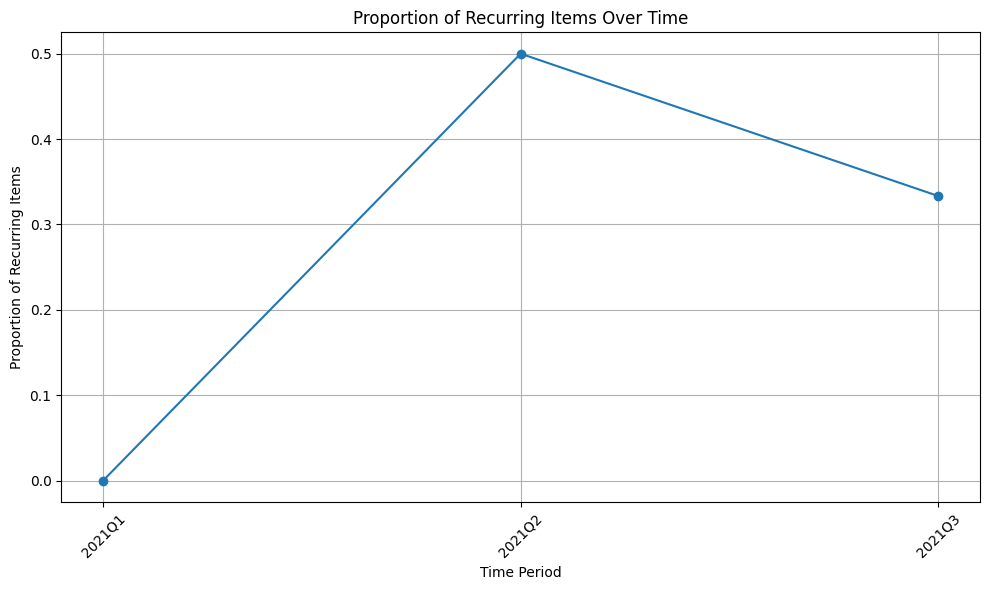

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame
# df should have columns 'item_id' and 'time_period'
# Example:
df = pd.DataFrame({
    'item_id': [1, 2, 1, 3, 4, 2, 5, 5],
    'time_period': ['2021Q1', '2021Q1', '2021Q2', '2021Q2', '2021Q3', '2021Q3', '2021Q3', '2021Q3']
})
print('original\n', df)

# Ensure 'time_period' is a categorical type with a proper order
df['time_period'] = pd.Categorical(df['time_period'], ordered=True)

# Sort DataFrame by 'time_period' and 'item_id'
df = df.sort_values(by=['time_period', 'item_id']).drop_duplicates()
print('drop_duplicates\n', df)

# Identify the first time period each item appears in
first_appearance = df.groupby('item_id')['time_period'].min().reset_index()
first_appearance.columns = ['item_id', 'first_time_period']
print('first_appearance (groupby)\n', first_appearance)

# Merge this information back to the original DataFrame
df = pd.merge(df, first_appearance, on='item_id')
print('df (merged)\n', df)

# Determine if the item is recurring in the current time period
df['is_recurring_item'] = df['time_period'] > df['first_time_period']
print('df (is_recurring_item)\n', df)

# Group by time period to get the count of recurring items and total items
time_period_stats = df.groupby('time_period')\
                        .agg( total_items=('item_id', 'nunique'),
                              recurring_items=('is_recurring_item', 'sum')).reset_index()

# Calculate the proportion of recurring items
time_period_stats['recurring_item_proportion'] = time_period_stats['recurring_items'] / time_period_stats['total_items']
print('time_period_stats\n', time_period_stats)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time_period_stats['time_period'], time_period_stats['recurring_item_proportion'], marker='o', linestyle='-')
plt.xlabel('Time Period')
plt.ylabel('Proportion of Recurring Items')
plt.title('Proportion of Recurring Items Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
